In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import datetime
import sys
import io
import requests

# Por desgracia, los ficheros CSV no están publicados, sólo un link para descarga, por lo
# que tendremos que guardar el contenido en un String para después tratarlo como un fichero
# usando io.StringIO.
# https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
contenido_descarga = requests.get(url).content

df = pd.read_csv(
    io.StringIO(contenido_descarga.decode('utf-8')),
    parse_dates=['dateRep'], 
    dayfirst=True,
    index_col='dateRep'
)
df.sort_index(inplace=True)

df['cases/100_000'] = df['cases'] / df['popData2019'] * 100_0000
df['deaths/100_000'] = df['deaths'] / df['popData2019'] * 100_0000
df['%deaths'] = df['deaths'] / df['cases'] * 100

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39329 entries, 2019-12-31 to 2020-08-29
Data columns (total 14 columns):
day                                                           39329 non-null int64
month                                                         39329 non-null int64
year                                                          39329 non-null int64
cases                                                         39329 non-null int64
deaths                                                        39329 non-null int64
countriesAndTerritories                                       39329 non-null object
geoId                                                         39161 non-null object
countryterritoryCode                                          39265 non-null object
popData2019                                                   39265 non-null float64
continentExp                                                  39329 non-null object
Cumulative_number_for_14_days_of_COVID

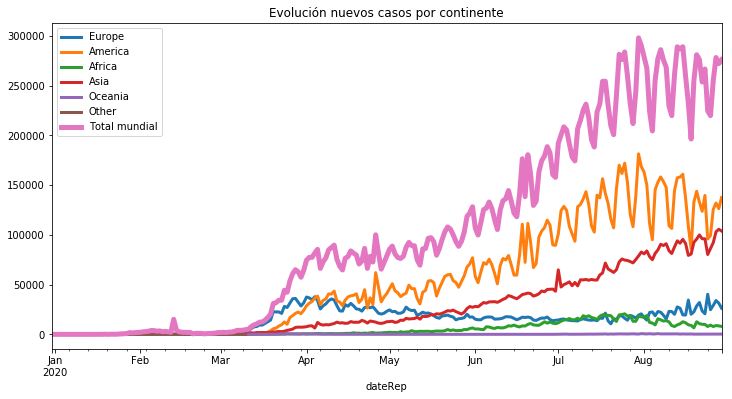

In [4]:
# Evolución nuevos casos por continente.
for continente in df['continentExp'].unique():
    df[(df['continentExp'] == continente)]['cases'] \
        .groupby(['dateRep'])                       \
        .sum()                                      \
        .plot(figsize=(12, 6), lw=3, title="Evolución nuevos casos por continente", legend=True, label=continente)
    
# Evolución nuevos casos mundial.
df['cases'].groupby(['dateRep']).sum().plot(lw=5, legend=True, label='Total mundial')

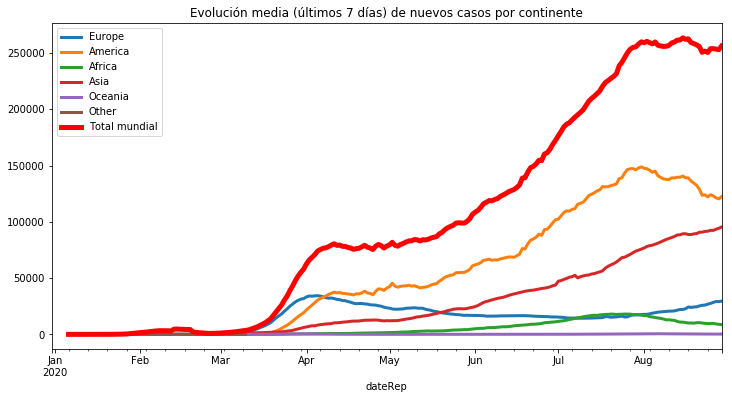

In [5]:
# Evolución media (últimos 7 días) de nuevos casos por continente
for continente in df['continentExp'].unique():
    df[(df['continentExp'] == continente)]['cases'] \
        .groupby(['dateRep'])                       \
        .sum()                                      \
        .rolling(7)                                 \
        .mean()                                     \
        .plot(figsize=(12, 6), lw=3, title="Evolución media (últimos 7 días) de nuevos casos por continente", legend=True, label=continente)

# Evolución media (últimos 7 días) de nuevos casos mundial
df['cases'].groupby(['dateRep']).sum().rolling(7).mean().plot(lw=5, legend=True, color='#ff0000', label='Total mundial')


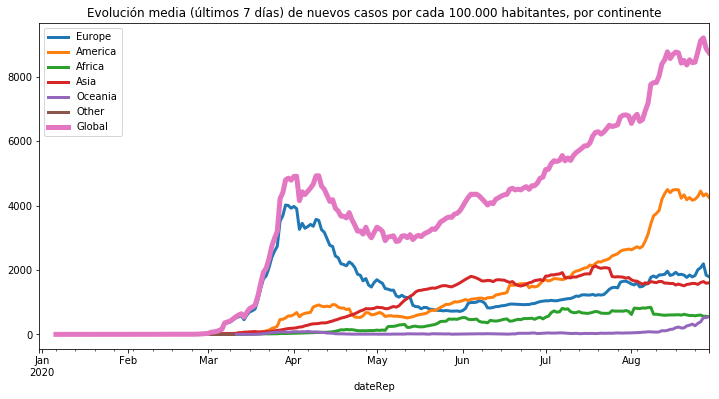

In [7]:
# Evolución media (últimos 7 días) de nuevos casos por cada 100.000 habitantes, por continente
for continente in df['continentExp'].unique():
    df[(df['continentExp'] == continente)]['cases/100_000'] \
        .groupby(['dateRep'])                       \
        .sum()                                      \
        .rolling(7)                                 \
        .mean()                                     \
        .plot(figsize=(12, 6), lw=3, title="Evolución media (últimos 7 días) de nuevos casos por cada 100.000 habitantes, por continente", legend=True, label=continente)
    
df['cases/100_000'] \
    .groupby(['dateRep'])                       \
    .sum()                                      \
    .rolling(7)                                 \
    .mean()                                     \
    .plot(figsize=(12, 6), lw=5, title="Evolución media (últimos 7 días) de nuevos casos por cada 100.000 habitantes, por continente", legend=True, label='Global')

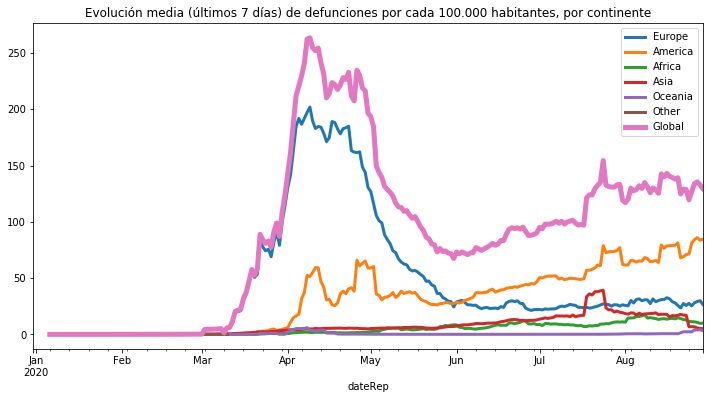

In [8]:
# Evolución media (últimos 7 días) de defunciones por cada 100.000 habitantes, por continente
for continente in df['continentExp'].unique():
    df[(df['continentExp'] == continente)]['deaths/100_000'] \
        .groupby(['dateRep'])                       \
        .sum()                                      \
        .rolling(7)                                 \
        .mean()                                     \
        .plot(figsize=(12, 6), lw=3, title="Evolución media (últimos 7 días) de defunciones por cada 100.000 habitantes, por continente", legend=True, label=continente)
df['deaths/100_000'] \
    .groupby(['dateRep'])                       \
    .sum()                                      \
    .rolling(7)                                 \
    .mean()                                     \
    .plot(figsize=(12, 6), lw=5, title="Evolución media (últimos 7 días) de defunciones por cada 100.000 habitantes, por continente", legend=True, label='Global')

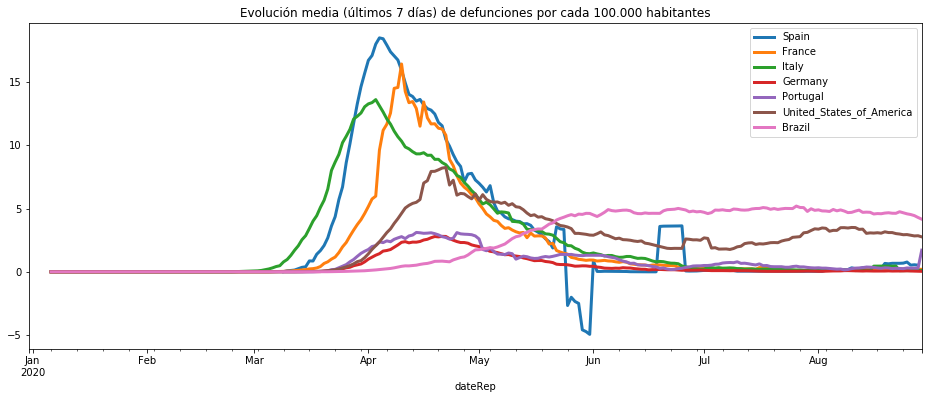

In [8]:
# Evolución media (últimos 7 días) de defunciones por cada 100.000 habitantes lista de paises
paises = ['Spain', 'France', 'Italy', 'Germany', 'Portugal', 'United_States_of_America', 'Brazil']
for pais in paises:
    df[(df['countriesAndTerritories'] == pais)]['deaths/100_000'] \
        .groupby(['dateRep'])                       \
        .sum()                                      \
        .rolling(7)                                 \
        .mean()                                     \
        .plot(figsize=(16, 6), lw=3, title="Evolución media (últimos 7 días) de defunciones por cada 100.000 habitantes", legend=True, label=pais)

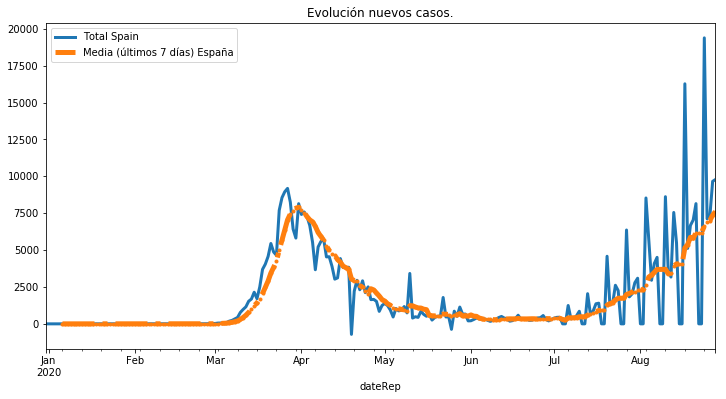

In [3]:
# Evolución de lista paises
# paises = ['Spain', 'France', 'Italy', 'Germany', 'Portugal']
paises = ['Spain']
for pais in paises:
    df[df['countriesAndTerritories'] == pais]['cases'].plot(figsize=(12, 6), title='Evolución nuevos casos.', lw=3, legend=True, label=f'Total {pais}')

df[df['countriesAndTerritories'] == 'Spain']['cases'].rolling(7).mean().plot(style='.-.', lw=5, legend=True, label=f'Media (últimos 7 días) España')


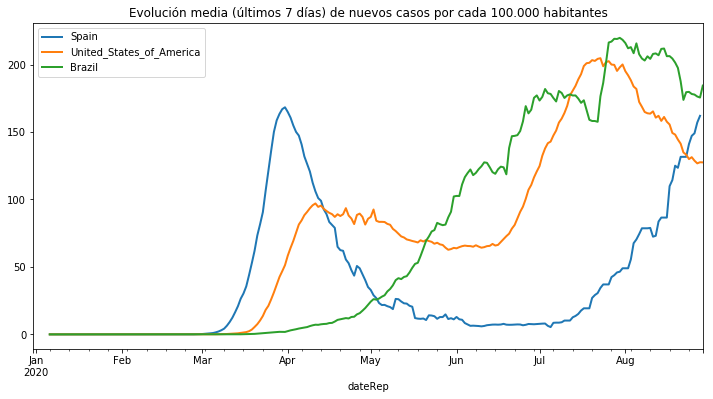

In [15]:
paises = ['Spain', 'United_States_of_America', 'Brazil']
for pais in paises:
   df[df['countriesAndTerritories'] == pais]['cases/100_000'].rolling(7).mean().plot(figsize=(12, 6), lw=2, title="Evolución media (últimos 7 días) de nuevos casos por cada 100.000 habitantes", legend=True, label=f'{pais}')

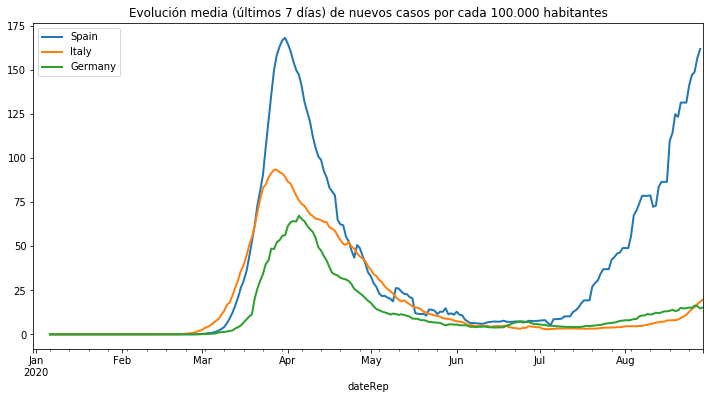

In [13]:
paises = ['Spain', 'Italy', 'Germany']
for pais in paises:
   df[df['countriesAndTerritories'] == pais]['cases/100_000'].rolling(7).mean().plot(figsize=(12, 6), lw=2, title="Evolución media (últimos 7 días) de nuevos casos por cada 100.000 habitantes", legend=True, label=f'{pais}')

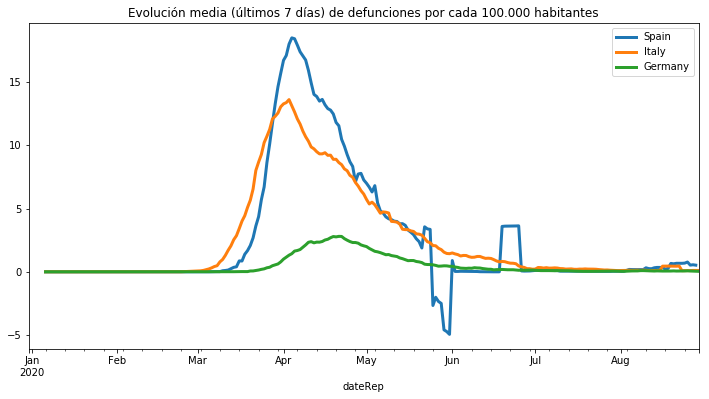

In [17]:
# Evolución media semanal (últimos 7 días) de defunciones por cada 100.000 habitantes, por continente
paises = ['Spain', 'Italy', 'Germany']
for pais in paises:
    df[(df['countriesAndTerritories'] == pais)]['deaths/100_000'] \
        .groupby(['dateRep'])                       \
        .sum()                                      \
        .rolling(7)                                 \
        .mean()                                     \
        .plot(figsize=(12, 6), lw=3, title="Evolución media (últimos 7 días) de defunciones por cada 100.000 habitantes", legend=True, label=pais)

In [ ]:
sum(df[df['countriesAndTerritories'] == 'Spain']['cases'])

In [ ]:
df[df['countriesAndTerritories'] == 'Spain'].tail()